### Exercise 1: Use the data1.csv to build a simple linear regression from scratch without using sklearn libraries and print the RMSE and mean absolute error values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

data = pd.read_csv(r'D:\Malathi\SEM_4\ML\data1.xls')
data.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


In [2]:
x = data.iloc[:,0]
y = data.iloc[:,1]

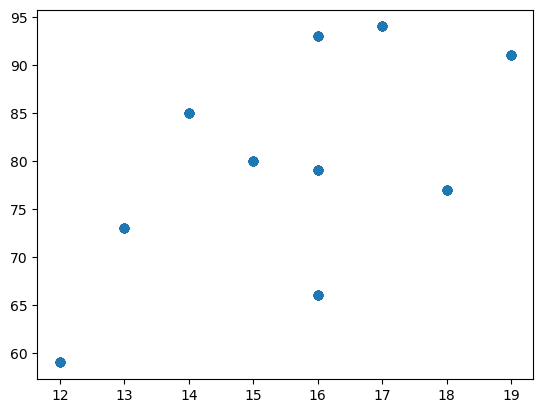

In [3]:
plt.scatter(x,y)

In [4]:
'''
regression line equation Y = mX+c
c = y' - mx'
m = sum(xiyi - y'xi)/xi^2 - x'xi)
'''

"\nregression line equation Y = mX+c\nc = y' - mx'\nm = sum(xiyi - y'xi)/xi^2 - x'xi)\n"

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       120 non-null    int64
 1   y       120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [6]:
m = sum((x*y) - (y.mean()*x))/sum((x*x) - x.mean()*x)
m

3.179245283018851

In [7]:
# using pearson's r
r = (sum((x-x.mean())*(y-y.mean())))/(math.sqrt(sum((x-x.mean())*(x-x.mean())))*math.sqrt(sum((y-y.mean())*(y-y.mean()))))
r

0.5960947613894618

In [8]:
std_x = math.sqrt(sum((x-x.mean())*(x-x.mean())))/math.sqrt((len(x)-1))

b1 = r*((np.std(y))/np.std(x))
print(b1)
print(np.std(x))
print(std_x)

3.179245283018865
2.0591260281974004
2.0677597181734737


In [9]:
b0 = y.mean()-b1*x.mean()
b0

30.10377358490571

0      84.150943
1      71.433962
2      68.254717
3      77.792453
4      80.971698
         ...    
115    74.613208
116    80.971698
117    80.971698
118    87.330189
119    90.509434
Name: x, Length: 120, dtype: float64

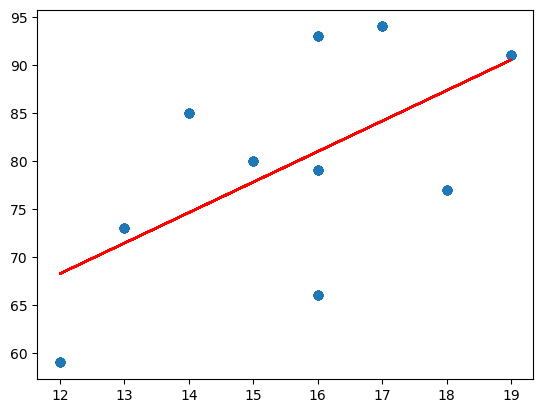

In [10]:
y_pred_pearson = b0+b1*x
plt.scatter(x,y)
plt.plot(x, y_pred_pearson, c='red')
y_pred_pearson

In [11]:
c = y.mean() - m*x.mean()
c

30.10377358490593

0      84.150943
1      71.433962
2      68.254717
3      77.792453
4      80.971698
         ...    
115    74.613208
116    80.971698
117    80.971698
118    87.330189
119    90.509434
Name: x, Length: 120, dtype: float64

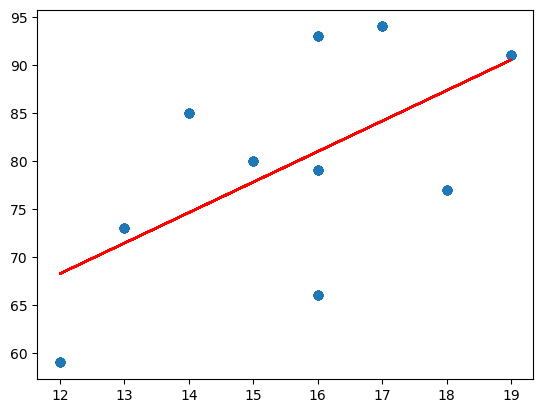

In [12]:
y_pred = m*x + c
plt.scatter(x,y)
plt.plot(x, y_pred, c='red')
y_pred

In [13]:
mse = sum((y-y_pred)**2)/120
mse_pearson = sum((y-y_pred_pearson)**2)/len(x)
print(mse)
print(mse_pearson)

77.75377358490566
77.75377358490566


In [14]:
rmse = np.sqrt(mse)
rmse_pearson = np.sqrt(mse_pearson)
print(rmse)
print(rmse_pearson)

8.817810022046611
8.817810022046611


### Exercise 2: Use the train.csv file to build a multiple linear regression model. sklearn shall be used to fit the model. Perform necessary preprocessing and check for outliers and multi-collinearity.
### Apply the same set of preprocessing to the test.csv and use the data to predict the house price. The evaluation criteria will be Root Mean Squared Error

In [15]:
house_pred = pd.read_csv(r'D:\Malathi\SEM_4\ML\house_pred.csv')
house_pred.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
house_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
house_pred = house_pred.drop(labels = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley'], axis=1)

In [18]:
house_pred = house_pred.dropna()

In [19]:
house_pred.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
house_pred.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [21]:
house_pred = house_pred[['SalePrice','Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [22]:
house_pred = house_pred.select_dtypes(exclude = 'object')

In [23]:
house_pred["Intercept"] = 1

In [24]:
house_pred

,SalePrice,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Intercept
0,208500,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,1
1,181500,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,1
2,223500,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,1
3,140000,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,1
4,250000,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1456,60,62.0,7917,6,5,1999,2000,0.0,...,0,40,0,0,0,0,0,8,2007,1
1456,210000,1457,20,85.0,13175,6,6,1978,1988,119.0,...,349,0,0,0,0,0,0,2,2010,1
1457,266500,1458,70,66.0,9042,7,9,1941,2006,0.0,...,0,60,0,0,0,0,2500,5,2010,1
1458,142125,1459,20,68.0,9717,5,6,1950,1996,0.0,...,366,0,112,0,0,0,0,4,2010,1


In [25]:
X = house_pred.iloc[:,1:]
Y = house_pred.iloc[:,0]

In [26]:
house_pred

,SalePrice,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Intercept
0,208500,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,1
1,181500,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,1
2,223500,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,1
3,140000,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,1
4,250000,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1456,60,62.0,7917,6,5,1999,2000,0.0,...,0,40,0,0,0,0,0,8,2007,1
1456,210000,1457,20,85.0,13175,6,6,1978,1988,119.0,...,349,0,0,0,0,0,0,2,2010,1
1457,266500,1458,70,66.0,9042,7,9,1941,2006,0.0,...,0,60,0,0,0,0,2500,5,2010,1
1458,142125,1459,20,68.0,9717,5,6,1950,1996,0.0,...,366,0,112,0,0,0,0,4,2010,1


In [27]:
house_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1094 non-null   int64  
 1   Id             1094 non-null   int64  
 2   MSSubClass     1094 non-null   int64  
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   OverallQual    1094 non-null   int64  
 6   OverallCond    1094 non-null   int64  
 7   YearBuilt      1094 non-null   int64  
 8   YearRemodAdd   1094 non-null   int64  
 9   MasVnrArea     1094 non-null   float64
 10  BsmtFinSF1     1094 non-null   int64  
 11  BsmtFinSF2     1094 non-null   int64  
 12  BsmtUnfSF      1094 non-null   int64  
 13  TotalBsmtSF    1094 non-null   int64  
 14  1stFlrSF       1094 non-null   int64  
 15  2ndFlrSF       1094 non-null   int64  
 16  LowQualFinSF   1094 non-null   int64  
 17  GrLivArea      1094 non-null   int64  
 18  BsmtFull

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def fix(data):
    vif = pd.DataFrame()
    vif['variable'] = data.columns
    vif['values'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    
    z = zip(vif['values'], vif['variable'])
    z = sorted(z, reverse = True)
    
    values, variable = zip(*z)
    
    if variable[0] != 'Intercept' and values[0] > 3:
        df = data.drop(variable[0], axis = 1).copy()
        print("Dropped: ", variable[0])
        return df, False
    elif variable[0] == 'Intercept' and values[1] > 3:
        df = data.drop(variable[1], axis = 1).copy()
        print("Dropped: ", variable[1])
        return df, False
    else:
        df = data.copy()
        return df, True

In [29]:
fixed = False
while not fixed:
    X, fixed = fix(X) 

C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropped:  TotalBsmtSF
Dropped:  LowQualFinSF
Dropped:  GrLivArea
Dropped:  BsmtFinSF1
Dropped:  YearBuilt
Dropped:  2ndFlrSF
Dropped:  GarageArea
Dropped:  TotRmsAbvGrd
Dropped:  GarageYrBlt


In [30]:
from sklearn.model_selection import train_test_split#spilt the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=reg.predict(x_test)

In [36]:
print('Regression intercept')
print(reg.intercept_)
print('Regression coefficient')
print(reg.coef_)

Regression intercept
-36870.94144405634
Regression coefficient
[-2.56438172e+00 -1.34873782e+02 -8.80279412e+00  6.09572216e-01
  2.36926801e+04  5.55081703e+03  1.19919022e+02  4.27827258e+01
 -1.12092221e+01 -1.20389937e+01  4.70347128e+01  9.07944419e+03
  6.15334936e+02  2.09278302e+04  2.18152263e+04  8.83335992e+02
 -2.18873719e+04  6.18411375e+03  2.04878321e+04  1.89867171e+01
  5.98915661e+01  1.42904801e+01  2.83272640e+01  4.03017000e+01
 -5.04395211e+01  8.35419029e-01 -4.62647124e+02 -1.55453114e+02
  0.00000000e+00]


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test,y_pred)
print("R square score: ",r2)
#mean_squared_error(y_test,y_pred)

R square score:  0.737464701579493
